In [1]:
import math
import numpy as np
import scipy as sc
import scipy.stats as sps
import matplotlib.pyplot as plt
from sympy import *
import re
from matplotlib import cm
from matplotlib import rcParams
%matplotlib inline

In [60]:
sizes =[0.65,0.9,0.75,0.85,0.7,0.8,0.6,0.9,2.1,2.15,2,2.2,2.15,2.20,2.05,2.1]
s_sizes = 0.025
ro_steel = 7.8
ro_glass = 2.5
diam = 3
delta = 10
sigma_t = 0.4
sigma_term = 0.1
atm = 99.5 * 8 * 1000
temp = [27.5, 36.5, 47.1, 54.9]
numbs = [[1,2,9,10],[3,4,11,12],[5,6,13,14],[7,8,15,16]]
t1 = [[26.80,12.20,11.6,11.7],[10.2,8.6,7.2,6.5],[6.70,4.5,3.70,3.60],[5.5,2.3,2.3,2.2]]
t2 = [[51.8,24.7,23.2,23],[21.5,16.8,14.4,13.30],[13.60,9.70,7.70,7.40], [11.4,5.1,4.8,4.9]]
g = 9.81

In [195]:
def get_visc(r, ro, ro_g, v):
    return 2/9 * g * r**2 * (ro - ro_g)/v

# def get_visc_mod(r, ro, ro_g, v):
#     return 2/9 * g/(1 + 2.4 * r/diam * 2) * r**2 * (ro - ro_g)/v

def sigma_visc(visc,t,r):
    return visc/t * sigma_t + 0.01*visc + (visc/r * s_sizes)

def get_ro_glic(t):
#     return 1275/(1 + 2.46810 * 10**(-4) * t) * 10 ** (-3)
    return 1.262 - (t-15)/24*0.01

def get_v(t,x):
    return x*delta/t

def get_Re(r,ro_g,v,eta):
    return 10**(-2)*v*ro_g*(10**3)*r*(10**(-2))/(eta) * 10 ** 3

def get_rel(r, ro, et):
    return 2/9*r**2*ro/et

In [196]:
ro_glic = [get_ro_glic(t) for t in temp]

In [197]:
print(ro_glic)

[1.2567916666666668, 1.2530416666666666, 1.248625, 1.2453750000000001]


[[   2.02070616    6.41858986]
 [  10.1295756    14.63834384]
 [  27.01016318   46.45897342]
 [  44.70898782  148.92682449]]
[[  16.41071915   16.30905306]
 [  44.45924553   47.37956899]
 [ 143.62437083  151.9714227 ]
 [ 385.61451071  361.22537375]]


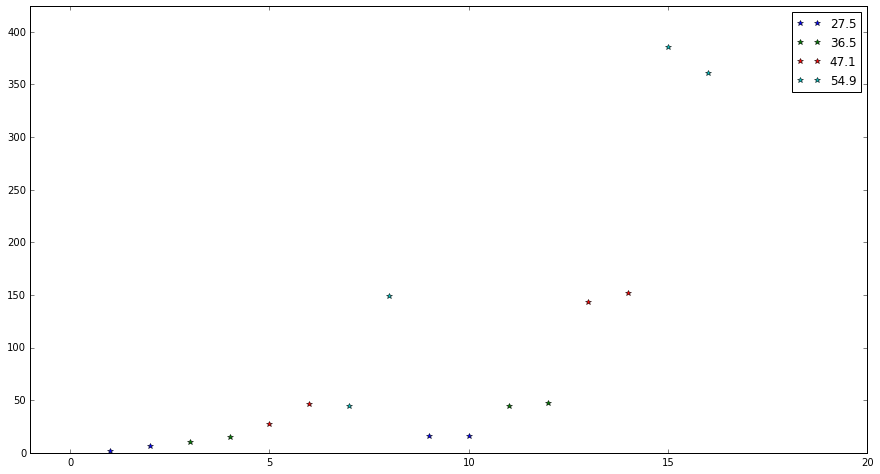

In [198]:
viscos = []
viscos_mod = []
sigma_viscos = []
Re = []
Rel = []
for i in range(4):
    vs = []
    sg = []
    re = []
    rel = []
    for j in range(4):
        if j < 2:
            roo = ro_steel
        else:
            roo = ro_glass
        v1 = get_v(t1[i][j],1)
        v2 = get_v(t2[i][j],2)
        vs.append([get_visc(sizes[numbs[i][j]-1], roo, ro_glic[i], v1), get_visc(sizes[numbs[i][j]-1], roo, ro_glic[i], v2)])
        sg.append([sigma_visc(vs[j][0], t1[i][j], sizes[numbs[i][j]-1]), sigma_visc(vs[j][1], t2[i][j], sizes[numbs[i][j]-1])])
        re.append(get_Re(sizes[numbs[i][j]-1], ro_glic[i], v2,vs[j][1]))
        rel.append(get_rel(sizes[numbs[i][j]-1], roo, vs[j][1])*v2)
    Rel.append(rel)
    Re.append(re)
    viscos.append(vs)
    sigma_viscos.append(sg)
viscos = np.array(viscos)
sigma_viscos = np.array(sigma_viscos)
Re = np.array(Re)
Rel = np.array(Rel)
# print(Rel)
# print(Re)
l = np.array([[x[0],x[1]] for x in Re])
b = np.array([[x[2],x[3]] for x in Re])
print(l)
print(b)
plt.figure(figsize=(15,8))
for i in range(4):
    plt.plot([2*i+1, 2*i + 2, 9 + 2*i, 9 + 2*i+ 1], Re[i], '*', label=temp[i])
plt.ylim([0,np.max([np.max(Re[i]) for i in range(4)])*1.1])
plt.xlim([-1,20])
plt.legend(loc='best')
plt.show()

[1561.0, 1427.0, 1386.0, 1441.0]
[863.0, 866.0, 783.0, 875.0]
[476.0, 443.0, 485.0, 489.0]
[293.0, 295.0, 276.0, 296.0]

[2.0, 6.4000000000000004, 16.399999999999999, 16.300000000000001]
[10.1, 14.6, 44.5, 47.399999999999999]
[27.0, 46.5, 143.59999999999999, 152.0]
[44.700000000000003, 148.90000000000001, 385.60000000000002, 361.19999999999999]

[88.0, 77.0, 54.0, 56.0]
[53.0, 55.0, 39.0, 45.0]
[36.0, 37.0, 36.0, 37.0]
[25.0, 34.0, 29.0, 31.0]

[6.0, 5.0, 4.0, 4.0]
[6.0, 6.0, 5.0, 5.0]
[8.0, 8.0, 7.0, 8.0]
[9.0, 12.0, 11.0, 10.0]
[ 1433.81200252   868.05223592   483.29914469   294.62165355]
[67.4213400919721 51.2566212690924 36.1087767156568 30.3291383679058]
[4.70224408594594, 5.90478535140949, 7.47130987340354, 10.2942665627116]


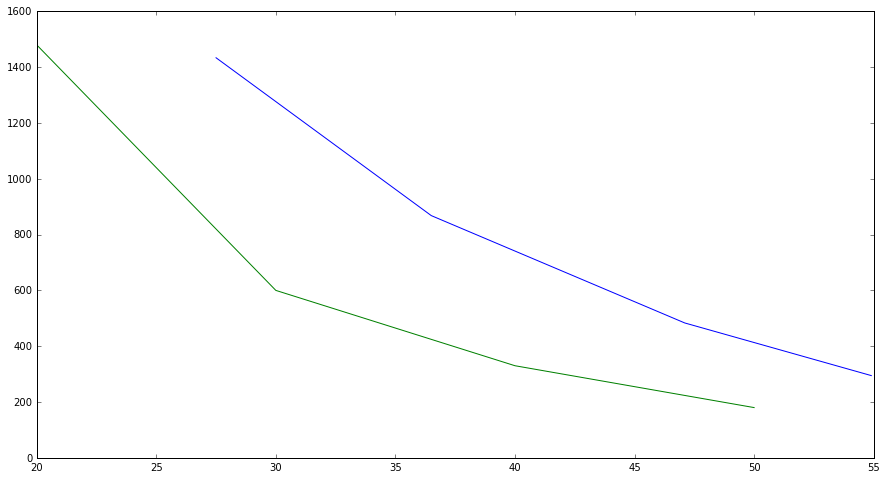

1.2495


In [199]:
for i in range(4):
    print([round(x[1]*100) for x in viscos[i]])
print()
for i in range(4):
    print([round(x,1) for x in Re[i]])
eps_viscos = []
for i in range(4):
    ep = []
    for j in range(4):
        ep.append([sigma_viscos[i][j][0]/viscos[i][j][0],sigma_viscos[i][j][1]/viscos[i][j][1]])
    eps_viscos.append(ep)
eps_viscos = np.array(eps_viscos)
# print( eps_viscos)
print()
for i in range(4):
    print([round(x[1]*100) for x in sigma_viscos[i]])
print()
for i in range(4):
    print([round(x[1]*100) for x in eps_viscos[i]])
    
vis_mod = [0 for i in range(4)]
vis_mod[0] = np.mean([viscos[0][i][1] for i in [1,3]])
vis_mod[1] = np.mean([viscos[1][i][1] for i in [0,1,3]])
vis_mod[2] = np.mean([viscos[2][i][1] for i in [0,2,3]])
vis_mod[3] = np.mean([viscos[3][i][1] for i in [0,1,3]])
sig_mod = [0 for i in range(4)]
sig_mod[0] = sqrt(np.mean([sigma_viscos[0][i][1]**2 for i in [1,3]]))
sig_mod[1] = sqrt(np.mean([sigma_viscos[1][i][1]**2 for i in [0,1,3]]))
sig_mod[2] = sqrt(np.mean([sigma_viscos[2][i][1]**2 for i in [0,2,3]]))
sig_mod[3] = sqrt(np.mean([sigma_viscos[3][i][1]**2 for i in [0,1,3]]))
sig_mod = np.array(sig_mod)
vis_mod = np.array(vis_mod)
    
print(vis_mod*100)
print(sig_mod*100)
print([sig_mod[i]/vis_mod[i]*100 for i in range(4)])
plt.figure(figsize=(15,8))
plt.plot(temp, vis_mod*100)
plt.plot([20,30,40,50],[1480,600,330,180])
plt.show()
print(get_ro_glic(45))

In [23]:
eps_model = []
for i in range(4):
    em = []
    for j in range(2):
        maxx = np.max([x[j] for x in viscos[i]])
        minn = np.min([x[j] for x in viscos[i]])
        em.append((maxx-minn)/minn)
    eps_model.append(em)
eps_model = np.array(eps_model)

In [24]:
print(eps_model)

[[ 0.17231525  0.13294645]
 [ 0.14058637  0.11756944]
 [ 0.14683333  0.09362972]
 [ 0.07896112  0.07865459]]


In [65]:
viscos_avg = []
viscos_std = []
viscos_sigma_avg = []
for i in range(4):
    viscos_avg.append(np.mean([viscos[i][j][1] for j in range(4) if(i == 3 and j != 2) or (i == 0 and j != 0 and j != 2) or (i == 1 and j != 2) or (i == 2 and j != 1)]))
    viscos_sigma_avg.append(sqrt(np.mean[viscos[i][j][1] for j in range(4)]))
    viscos_std.append(np.std([viscos[i][j][1] for j in range(4) if(i == 3 and j != 2) or (i == 0 and j != 0 and j != 2) or (i == 1 and j != 2) or (i == 2 and j != 1)]) + 0.02 * viscos_avg[i])
    print(viscos_avg[i], viscos_std[i])
viscos_avg = np.array(viscos_avg)
viscos_std = np.array(viscos_std)

14.271938253 0.309153834131
8.6464787095 0.196939641396
4.79973511072 0.133083598864
2.93257577316 0.0679729389446


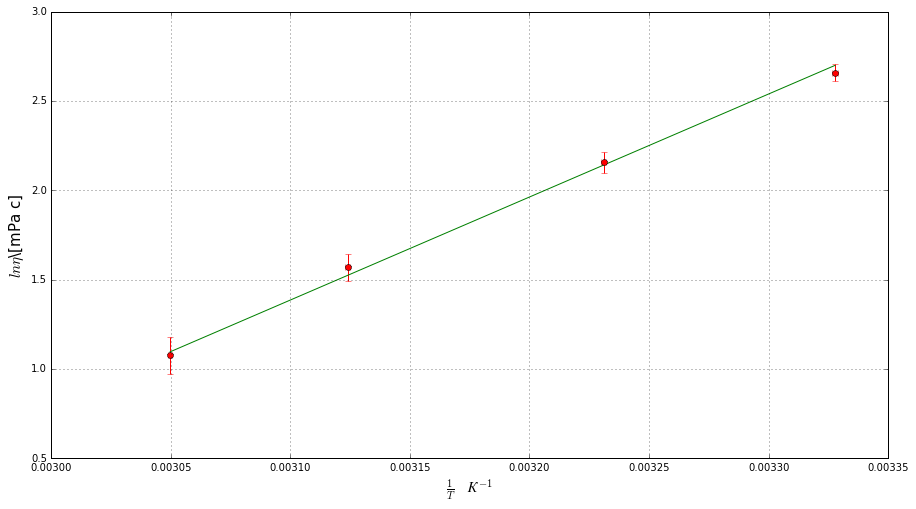

k_mean:  5769.88439994330
W_mean:  7962.44047192176  *e-23
W_sigma:  271.530555395257
W_eps:  0.0341014235965424


In [143]:
plt.figure(figsize=(15,8))
plt.title(r'',fontsize=15)
errg = [sigma_term/(t+273)**2 for t in temp]
errv = [sig_mod[i]/vis_mod[i] for i in range(4)]
tp = [1/(t + 273) for t in temp]
lnvis = [log(v) for v in vis_mod]
k = np.mean([(lnvis[i+1] - lnvis[i])/(tp[i+1] - tp[i]) for i in range(3)])
b = np.mean([lnvis[i] - k * tp[i] for i in range(4)])
line = [k*tp[i] + b for i in range(4)]
plt.plot(tp, lnvis, '*')
plt.plot(tp,line)
plt.errorbar(tp, lnvis, xerr=errg, yerr=errv,fmt='o')
plt.xlabel(r'$\frac{1}{T} \quad К^{-1}$',fontsize=15)
plt.ylabel(r'$ln \eta $\[mPa c]',fontsize=15)
# plt.ylim([0, len(data)*1.1])
plt.grid(True)
plt.show()
epss = sqrt((0.1/np.min(vis_mod))**2 + (0.1/293)**2)
print('k_mean: ', k)
print('W_mean: ', k*1.38, ' *e-23')
print('W_sigma: ', k*1.38 * epss)
print('W_eps: ', epss)